In [1]:
import numpy as np
import tensorflow.keras
from tensorflow.keras import layers, models, regularizers
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
from tensorflow.compat.v1.keras.backend import set_session
from tensorflow.compat.v1 import ConfigProto, Session
import tensorflow.keras
config = ConfigProto(allow_soft_placement=True)

config.gpu_options.per_process_gpu_memory_fraction = 0.7
set_session(Session(config=config))

In [2]:
def build_model(regulartion_rate=0.001):
    regulartion_rate = 0.01
    model = models.Sequential()
    model.add(
        layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3), kernel_regularizer=regularizers.l2(0))
    )
    model.add(
        layers.MaxPooling2D((2,2))
    )
    model.add(
        layers.Conv2D(64, (3,3), activation='relu', kernel_regularizer=regularizers.l2(0))
    )
    model.add(
        layers.MaxPooling2D((2,2))
    )
    model.add(
        layers.Conv2D(128, (3,3), activation='relu', kernel_regularizer=regularizers.l2(0))
    )
    model.add(
        layers.MaxPooling2D((2,2))
    )
    model.add(
        layers.Conv2D(128, (3,3), activation='relu', kernel_regularizer=regularizers.l2(0))
    )
    model.add(
        layers.MaxPooling2D((2,2))
    )
    model.add(
        layers.Flatten()
    )
    model.add(
        layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0))
    )
    model.add(
        layers.Dense(1, activation='sigmoid')
    )
    model.compile(
        optimizer='rmsprop',
        metrics=['accuracy'],
        loss='binary_crossentropy'
    )
    model.optimizer.lr = 1e-4
    return model

In [3]:
from matplotlib.image import imread
import os
def read_image(animal):
    target_train_path = '/home/oneran/dog-vs-cats/train/train_'+animal+'_img'
    target_test_path = '/home/oneran/dog-vs-cats/test/test_'+animal+'_img'
    target_val_path = '/home/oneran/dog-vs-cats/val/val_'+animal+'_img'
    train_data = imread('/home/oneran/dog-vs-cats/train/train_dog_img/dog.1.jpg').reshape([1, 150, 150, 3])
    test_data = imread('/home/oneran/dog-vs-cats/train/train_dog_img/dog.1.jpg').reshape([1, 150, 150, 3])
    val_data = imread('/home/oneran/dog-vs-cats/train/train_dog_img/dog.1.jpg').reshape([1, 150, 150, 3])
    
    for f in os.listdir(target_train_path):
    
        train_data = np.concatenate((train_data, imread(target_train_path+'/'+f).reshape([1, 150, 150, 3])))
    
    for f in os.listdir(target_test_path):
       
        test_data = np.concatenate((test_data, imread(target_test_path+'/'+f).reshape([1, 150, 150, 3])))

    for f in os.listdir(target_val_path):

        val_data = np.concatenate((val_data, imread(target_val_path+'/'+f).reshape([1, 150, 150, 3])))

    return train_data[1:], val_data[1:], test_data[1:]
                

In [4]:
from tensorflow.image import per_image_standardization

In [5]:
train_dog_data, val_dog_data, test_dog_data = read_image('dog')
train_cat_data, val_cat_data, test_cat_data = read_image('cat')

In [6]:
train_label_1 = np.zeros([len(train_dog_data), 1])
train_label_2 = np.ones([len(train_cat_data), 1])
val_label_1 = np.zeros([len(val_dog_data), 1])
val_label_2 = np.ones([len(val_cat_data), 1])
test_label_1 = np.zeros([len(test_dog_data), 1])
test_label_2 = np.ones([len(test_cat_data), 1])
# 0 -> dog 
# 1 -> cat
train_label = np.concatenate((train_label_1, train_label_2))
val_label = np.concatenate((val_label_1, val_label_2))
test_label = np.concatenate((test_label_1, test_label_2))

train_data = np.concatenate((train_dog_data, train_cat_data))
val_data = np.concatenate((val_dog_data, val_cat_data))
test_data = np.concatenate((test_dog_data, test_cat_data))


In [7]:
print(train_data.shape)
print(test_data.shape)
print(val_data.shape)

(2000, 150, 150, 3)
(1000, 150, 150, 3)
(1000, 150, 150, 3)


In [90]:
def DataProcess(data):
    data = data / 255
    pre_format_data = data.copy()
    data = data.swapaxes(0,1).swapaxes(1,2) - np.average(data.swapaxes(1,2).swapaxes(1,3).reshape(pre_format_data.shape[0], pre_format_data.shape[3], pre_format_data.shape[1] * pre_format_data.shape[2]), axis=2)
    data = data.swapaxes(1,2).swapaxes(0,1)
    data = data.swapaxes(0,1).swapaxes(1,2) / np.std(data.swapaxes(1,2).swapaxes(1,3).reshape(pre_format_data.shape[0], pre_format_data.shape[3], pre_format_data.shape[1] * pre_format_data.shape[2]), axis=2)
    data = data.swapaxes(1,2).swapaxes(0,1)
    return data
def LabelProcess(label):
    label_ = np.zeros([len(label), 2])
    label_[np.where(label==1),1] = 1
    label_[np.where(label==0),0] = 1
    return label_

In [8]:
def DataProcessRewrite(data):
    data = data / 255.
    for i, single_data in enumerate(data):
        single_data -= single_data.mean()
        single_data /= single_data.std()
        data[i] = single_data
    return data

In [16]:
train_data[0].std()

54.281256300770195

In [46]:
np.std(train_data.swapaxes(1,3).reshape([train_data.shape[0],train_data.shape[3],train_data.shape[1]*train_data.shape[2]]), axis=2).shape

(2000, 3)

In [11]:
train_data_process = DataProcessRewrite(train_data)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


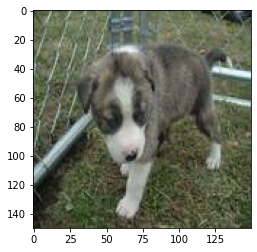

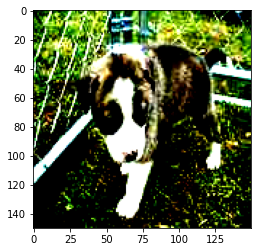

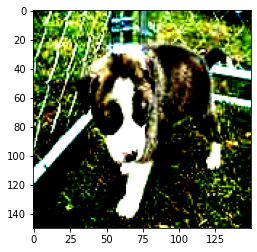

In [13]:
import matplotlib.pyplot as plt
i = np.random.random_integers(1000)
plt.figure(1)
plt.imshow(train_data[i])
plt.figure(2)
tf_image_process = per_image_standardization(train_data[i])
plt.imshow(tf_image_process)
plt.figure(3)
plt.imshow(train_data_process[i])

In [91]:
train_data_process = DataProcess(train_data)
test_data_process = DataProcess(test_data)
val_data_process = DataProcess(val_data)

In [10]:
# train_label = LabelProcess(train_label)
# test_label = LabelProcess(test_label)
# val_label = LabelProcess(val_label)

In [82]:
import datetime
from tensorflow.keras.callbacks import TensorBoard

In [83]:
dir_log = '/home/oneran/Mycodes/DeepLearning/log/MiniDataSets_'+str(datetime.datetime.now())+'_runtime_6'
callback_tensorflow = TensorBoard(log_dir=dir_log, histogram_freq=1)
model = build_model()
model.fit(
    train_data, train_label,
    epochs=30,
    batch_size=20,
    validation_data = (val_data, val_label),
    callbacks=callback_tensorflow
)

Epoch 1/30
100/100 [==============================] - 10s 36ms/step - loss: 6.5211 - accuracy: 0.5117 - val_loss: 0.6844 - val_accuracy: 0.5790
Epoch 2/30
100/100 [==============================] - 3s 29ms/step - loss: 0.6197 - accuracy: 0.6786 - val_loss: 0.6622 - val_accuracy: 0.6320
Epoch 3/30
100/100 [==============================] - 3s 29ms/step - loss: 0.5226 - accuracy: 0.7474 - val_loss: 0.6544 - val_accuracy: 0.6440
Epoch 4/30
100/100 [==============================] - 3s 29ms/step - loss: 0.3834 - accuracy: 0.8212 - val_loss: 0.7074 - val_accuracy: 0.6380
Epoch 5/30
100/100 [==============================] - 3s 29ms/step - loss: 0.3175 - accuracy: 0.8616 - val_loss: 0.7238 - val_accuracy: 0.6430
Epoch 6/30
100/100 [==============================] - 3s 29ms/step - loss: 0.2331 - accuracy: 0.9029 - val_loss: 0.8039 - val_accuracy: 0.6710
Epoch 7/30
100/100 [==============================] - 3s 29ms/step - loss: 0.2103 - accuracy: 0.9226 - val_loss: 1.0080 - val_accuracy: 0.645

In [13]:
model.evaluate(test_data, test_label)

32/32 [==============================] - 1s 17ms/step - loss: 1.2138 - accuracy: 0.6540


[1.213823676109314, 0.6539999842643738]